<footer id="footer"></footer>

<h1 align='center'>Seq2Seq. Neural Machine Translation</h1>
<p align="center"><img src="https://drive.google.com/uc?id=1j6gMHuo0gR4fMKJu3vFnJbWgbh6G7MWT"  border="0"></a></p>





<b> **Baseline** подготовлен [Deep learning school](https://www.dlschool.org/pro-track) и [Ya.DataShcool](https://github.com/yandexdataschool/nlp_course)

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


##  Attention

Attention layer can take in the previous hidden state of the decoder $s_{t-1}$, and all of the stacked forward and backward hidden states $H$ from the encoder. The layer will output an attention vector $a_t$, that is the length of the source sentence, each element is between 0 and 1 and the entire vector sums to 1.

Intuitively, this layer takes what we have decoded so far $s_{t-1}$, and all of what we have encoded $H$, to produce a vector $a_t$, that represents which words in the source sentence we should pay the most attention to in order to correctly predict the next word to decode $\hat{y}_{t+1}$. The decoder input word that has been embedded  $y_t$.

You can use any type of the attention scores between previous hidden state of the encoder $s_{t-1}$ and hidden state of the decoder $h \in H$, you prefer. We have met at least three of them:<br><br>

---
<font size="2"> `Attention` может принимать предыдущее скрытое состояние декодера $s_{t-1}$ и все конкатенированные `forward` и `backward` скрытые состояния $H$ от кодировщика. Слой выдает вектор `attention` $a_t$, то есть длину исходного предложения, каждый элемент которого находится в диапазоне от 0 до 1, а сумма всего вектора равна 1.
Интуитивно этот слой берет то, что мы уже раскодировали $s_{t-1}$, и все то, что мы закодировали $H$, чтобы создать вектор $a_t$, представляющий, какие слова в исходном предложении мы должны обратить наибольшее внимание, чтобы правильно предсказать следующее слово для декодирования $\hat{y}_{t+1}$. Входное слово декодера, которое было встроено в $y_t$.
Мы можем использовать любой тип оценки внимания между предыдущим скрытым состоянием кодировщика $s_{t-1}$ и скрытым состоянием декодера $h \in H$. Мы встречали как минимум три из них: </font>


$$\operatorname{score}\left(\boldsymbol{h}, \boldsymbol{s}_{t-1}\right)=\left\{\begin{array}{ll}
\boldsymbol{h}^{\top} \boldsymbol{s}_{t-1} & \text { dot } \\
\boldsymbol{h}^{\top} \boldsymbol{W}_{\boldsymbol{a}} \boldsymbol{s}_{t-1} & \text { general } \\
\boldsymbol{v}_{a}^{\top} \tanh \left(\boldsymbol{W}_{\boldsymbol{a}}\left[\boldsymbol{h} ; \boldsymbol{s}_{t-1}\right]\right) & \text { concat }
\end{array}\right.$$
--------


**_We wil use "concat attention"_**:

First, we calculate the *energy* between the previous decoder hidden state $s_{t-1}$ and the encoder hidden states $H$. As our encoder hidden states $H$ are a sequence of $T$ tensors, and our previous decoder hidden state $s_{t-1}$ is a single tensor, the first thing we do is `repeat` the previous decoder hidden state $T$ times. $\Rightarrow$<br><br>

---

<font size="2">**_Мы будем использовать «concat attention»_**:

Во-первых, мы вычисляем *энергию* между предыдущим скрытым состоянием декодера $s_{t-1}$ и скрытыми состояниями кодировщика $H$. Поскольку скрытые состояния нашего кодировщика $H$ представляют собой последовательность тензоров $T$, а наше предыдущее скрытое состояние декодера $s_{t-1}$ представляет собой один тензор, первое, что мы делаем, это `повторяем` предыдущее скрытое состояние декодера. $T$ раз. $\Rightarrow$<br>
У нас есть:</font>

$$H = \bigl[\boldsymbol{h}_{0}, ..., \boldsymbol{h}_{T-1}\bigr] \\ \bigl[\boldsymbol{s}_{t-1}, ..., \boldsymbol{s}_{t-1}\bigr]$$

The encoder hidden dim and the decoder hidden dim should be equal: **dec hid dim = enc hid dim**.<br>
 We then calculate the energy, $E_t$, between them by concatenating them together:<br>

 ---
<font size="2">Скрытый размер кодировщика и скрытый размер декодера должны быть равны: **dec hid dim = enc hid dim**.<br>
Затем мы вычисляем энергию $E_t$ между ними, объединяя их вместе:<br></font>

$$\bigl[[\boldsymbol{h}_{0}, \boldsymbol{s}_{t-1}], ..., [\boldsymbol{h}_{T-1}, \boldsymbol{s}_{t-1}]\bigr]$$

And passing them through a linear layer (`attn` = $\boldsymbol{W}_{\boldsymbol{a}}$) and a $\tanh$ activation function:

---

<font size="2">И пропуская их через линейный слой (`attn` = $\boldsymbol{W}_{\boldsymbol{a}}$) и функцию активации $\tanh$:</font>

$$E_t = \tanh(\text{attn}(H, s_{t-1}))$$ 

This can be thought of as calculating how well each encoder hidden state "matches" the previous decoder hidden state.

We currently have a **[enc hid dim, src sent len]** tensor for each example in the batch. We want this to be **[src sent len]** for each example in the batch as the attention should be over the length of the source sentence. This is achieved by multiplying the `energy` by a **[1, enc hid dim]** tensor, $v$.

---

<font size="2">Это можно рассматривать как вычисление того, насколько хорошо каждое скрытое состояние кодировщика «соответствует» предыдущему скрытому состоянию декодера.

В настоящее время у нас есть тензор **[enc hid dim, src send len]** для каждого примера в батче. Мы хотим, чтобы это было **[src send len]** для каждого примера в батче, поскольку внимание должно быть сосредоточено на длине исходного предложения. Это достигается путем умножения «энергии» на тензор **[1, enc hid dim]**, $v$.</font>

$$\hat{a}_t = v E_t$$


We can think of this as calculating a weighted sum of the "match" over all `enc_hid_dem` elements for each encoder hidden state, where the weights are learned (as we learn the parameters of $v$).

Finally, we ensure the attention vector fits the constraints of having all elements between 0 and 1 and the vector summing to 1 by passing it through a $\text{softmax}$ layer.

---

<font size="2">Мы можем думать об этом как о вычислении взвешенной суммы «совпадений» по всем элементам `enc_hid_dem` для каждого скрытого состояния кодировщика, где веса подбираются (по мере того, как мы изучаем параметры $v$).

Наконец, мы обеспечиваем соответствие вектора внимания ограничениям наличия всех элементов от 0 до 1 и вектора, результирующего в сумму, равную 1, пропуская его через слой $\text{softmax}$.</font>

$$a_t = \text{softmax}(\hat{a_t})$$

### Temperature SoftMax

<img src="https://miro.medium.com/max/793/1*S5X1pBq_jfDreJOs7yP-ZQ.png" height=100>

This gives us the attention over the source sentence!

Graphically, this looks something like below. $z = s_{t-1}$. The green/yellow blocks represent the hidden states from both the forward and backward RNNs, and the attention computation is all done within the pink block.

---

<font size="2">Это дает нам `attention` по исходному предложению!

Графически это выглядит примерно так, как показано ниже. $z = s_{t-1}$. Зелено-желтые блоки представляют скрытые состояния как прямой, так и обратной RNN, а расчет внимания выполняется внутри розового блока.</font>


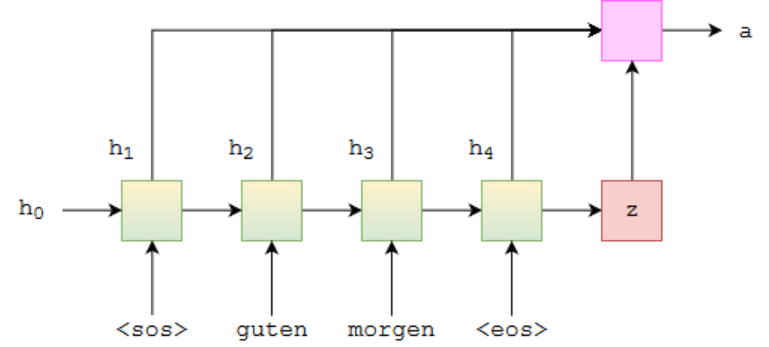

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


# Neural Machine Translation


In [ ]:
! wget https://drive.google.com/uc?id=1NWYqJgeG_4883LINdEjKUr6nLQPY6Yb_ -O data.txt
# запасная
# !wget https://drive.google.com/file/d/1wzxICB90Z23ydzRZHct171_3UoRSlPQa/view?usp=sharing -O data.txt

# Thanks to YSDA NLP course team for the data
# (who thanks tilda and deephack teams for the data in their turn)

--2022-05-07 20:04:46--  https://drive.google.com/uc?id=1NWYqJgeG_4883LINdEjKUr6nLQPY6Yb_
Resolving drive.google.com (drive.google.com)... 142.251.8.100, 142.251.8.138, 142.251.8.102, ...
Connecting to drive.google.com (drive.google.com)|142.251.8.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-14-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c3g476f9c25giibic440gmv97g88cma7/1651953825000/16549096980415837553/*/1NWYqJgeG_4883LINdEjKUr6nLQPY6Yb_ [following]
--2022-05-07 20:04:48--  https://doc-14-00-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/c3g476f9c25giibic440gmv97g88cma7/1651953825000/16549096980415837553/*/1NWYqJgeG_4883LINdEjKUr6nLQPY6Yb_
Resolving doc-14-00-docs.googleusercontent.com (doc-14-00-docs.googleusercontent.com)... 64.233.189.132, 2404:6800:4008:c07::84
Connecting to doc-14-00-docs.googleusercontent.com (doc-14-00-docs.googleusercontent.com)|64.233.189.132|:44

In [ ]:
!pip install -q torchtext==0.6.0

     |████████████████████████████████| 64 kB 1.7 MB/s 
     |████████████████████████████████| 1.2 MB 9.2 MB/s 


In [ ]:
import torchtext
from torchtext import data, datasets

import tqdm
import math
import time
import spacy
import random
import imp
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim

import warnings
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import clear_output
from nltk.tokenize import WordPunctTokenizer
from nltk.translate.bleu_score import corpus_bleu


%matplotlib inline

warnings.filterwarnings("ignore")
plt.style.use('dark_background')
matplotlib.rcParams.update({'figure.figsize': (16, 12), 'font.size': 14})

We'll set the random seeds for deterministic results.

---

<font size="2">Мы установим seed для детерминированных результатов</font>

In [ ]:
SEED = 42

random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)
torch.backends.cudnn.deterministic = True

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


## Preparing Data

Here comes the preprocessing

---

<font size="2">Сделаем предварительную обработку данных</font>

In [ ]:
tokenizer_W = WordPunctTokenizer()

def tokenize_ru(x, tokenizer=tokenizer_W):
    return tokenizer.tokenize(x.lower())[::-1]

def tokenize_en(x, tokenizer=tokenizer_W):
    return tokenizer.tokenize(x.lower())

In [ ]:
SRC = data.Field(tokenize=tokenize_ru,
                init_token = '<sos>', 
                eos_token = '<eos>', 
                include_lengths = True,
                lower = True)

TRG = data.Field(tokenize=tokenize_en,
                init_token = '<sos>', 
                eos_token = '<eos>', 
                lower = True)


dataset = torchtext.data.TabularDataset(
    path='data.txt',
    format='tsv',
    fields=[('trg', TRG), ('src', SRC)]
)

In [ ]:
dataset.examples[0].src

['.',
 'собора',
 'троицкого',
 '-',
 'свято',
 'от',
 'ходьбы',
 'минутах',
 '3',
 'в',
 ',',
 'тбилиси',
 'в',
 'расположен',
 'cordelia',
 'отель']

In [ ]:
print(len(dataset.examples))
print(dataset.examples[0].src)
print(dataset.examples[0].trg)

50000
['.', 'собора', 'троицкого', '-', 'свято', 'от', 'ходьбы', 'минутах', '3', 'в', ',', 'тбилиси', 'в', 'расположен', 'cordelia', 'отель']
['cordelia', 'hotel', 'is', 'situated', 'in', 'tbilisi', ',', 'a', '3', '-', 'minute', 'walk', 'away', 'from', 'saint', 'trinity', 'church', '.']


In [ ]:
train_data, valid_data, test_data = dataset.split(split_ratio=[0.8, 0.15, 0.05])


print(f"Number of training examples: {len(train_data.examples)}")
print(f"Number of validation examples: {len(valid_data.examples)}")
print(f"Number of testing examples: {len(test_data.examples)}")

Number of training examples: 40000
Number of validation examples: 2500
Number of testing examples: 7500


In [ ]:
SRC.build_vocab(train_data, min_freq = 2)
TRG.build_vocab(train_data, min_freq = 2)

In [ ]:
print(f"Unique tokens in source (ru) vocabulary: {len(SRC.vocab)}")
print(f"Unique tokens in target (en) vocabulary: {len(TRG.vocab)}")

Unique tokens in source (ru) vocabulary: 14115
Unique tokens in target (en) vocabulary: 10170


And here is example from train dataset:

---

<font size="2">А вот пример из набора данных:</font>

In [ ]:
print(vars(train_data.examples[9]))

{'trg': ['free', 'private', 'parking', 'is', 'available', 'on', 'site', '.'], 'src': ['.', 'парковка', 'частная', 'бесплатная', 'обустроена', 'территории', 'прилегающей', 'на']}


When we get a batch of examples using an iterator we need to make sure that all of the source sentences are padded to the same length, the same with the target sentences. Luckily, TorchText iterators handle this for us! 

We use a `BucketIterator` instead of the standard `Iterator` as it creates batches in such a way that it minimizes the amount of padding in both the source and target sentences. 

____

<font size="2">Когда мы получаем батч примеров с помощью итератора, нам нужно убедиться, что все исходные предложения дополнены до одинаковой длины, как и целевые предложения. К счастью, итераторы TorchText справляются с этим за нас!
Мы используем `BucketIterator` вместо стандартного `Iterator`, так как он создает пакеты таким образом, что минимизирует количество отступов как в исходном, так и в целевом предложениях.</font>

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
def _len_sort_key(x):
    return len(x.src)

BATCH_SIZE = 64

train_iterator, valid_iterator, test_iterator = data.BucketIterator.splits(
    (train_data, valid_data, test_data), 
    batch_size = BATCH_SIZE, 
    sort_within_batch = True,
    device = device,
    sort_key=_len_sort_key
)

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


## modules.py

In [ ]:
!gdown 1Hmj7ktdwhUJoR88C8nCwM1EadyRn1oQh

In [ ]:
!ls /content/modules.py

/content/modules.py


In [ ]:
%cd .

/content


<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


## Encoder

For a multi-layer RNN, the input sentence, $X$, goes into the first (bottom) layer of the RNN and hidden states, $H=\{h_1, h_2, ..., h_T\}$, output by this layer are used as inputs to the RNN in the layer above. Thus, representing each layer with a superscript, the hidden states in the first layer are given by:

___

<font size="2">Для многослойной RNN входное предложение $X$ переходит в первый (нижний) слой RNN, а скрытые состояния $H=\{h_1, h_2, ..., h_T\}$ выводятся с помощью этот слой используется в качестве входных данных для RNN в слое выше. Таким образом, представляя каждый слой верхним индексом, скрытые состояния в первом слое задаются следующим образом:</font>

$$h_t^1 = \text{EncoderRNN}^1(x_t, h_{t-1}^1)$$

The hidden states in the second layer are given by:
___

<font size="2">Скрытые состояния во втором слое задаются следующим образом:</font>

$$h_t^2 = \text{EncoderRNN}^2(h_t^1, h_{t-1}^2)$$

Extending our multi-layer equations to LSTMs, we get:
---

<font size="2">Расширяя наши многослойные вычисления до LSTM, мы получаем:</font>

$$\begin{align*}
(h_t^1, c_t^1) &= \text{EncoderLSTM}^1(x_t, (h_{t-1}^1, c_{t-1}^1))\\
(h_t^2, c_t^2) &= \text{EncoderLSTM}^2(h_t^1, (h_{t-1}^2, c_{t-1}^2))
\end{align*}$$

<br><br>
<img src="https://drive.google.com/uc?id=1uIUxtZU8NvGdz0J9BlRSTbsBLFh32rxx">

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


## Attention

$$\operatorname{score}\left(\boldsymbol{h}, \boldsymbol{s}_{t-1}\right)=
\boldsymbol{v}_{a}^{\top} \tanh \left(\boldsymbol{W}_{\boldsymbol{a}}\left[\boldsymbol{h} ; \boldsymbol{s}_{t-1}\right]\right) \text { - concat attention}$$

## Decoder with Attention

To make it really work you should also change the`Decoder` class in order to make it to use `Attention`. 


The decoder contains the attention layer `attention`, which takes the previous hidden state $s_{t-1}$, all of the encoder hidden states $H$, and returns the attention vector $a_t$.

We then use this attention vector to create a weighted source vector, $w_t$, denoted by `weighted`, which is a weighted sum of the encoder hidden states, $H$, using $a_t$ as the weights.

___

<font size="2">Чтобы это действительно работало, вы также должны изменить класс decoder, чтобы заставить его использовать Attention.

Декодер содержит уровень внимания attention, который принимает предыдущее скрытое состояние $s_{t-1}$, все скрытые состояния кодировщика $H$ и возвращает вектор внимания $a_t$.
Затем мы используем этот вектор внимания для создания взвешенного исходного вектора, $w_t$, обозначаемого как «взвешенный», который представляет собой взвешенную сумму скрытых состояний кодировщика, $H$, используя $a_t$ в качестве весов.</font>

$$w_t = a_t H$$

The input word that has been embedded $y_t$, the weighted source vector $w_t$, and the previous decoder hidden state $s_{t-1}$, are then all passed into the decoder RNN, with $y_t$ and $w_t$ being concatenated together.

___
<font size="2">Встроенное входное слово $y_t$, взвешенный исходный вектор $w_t$ и предыдущее скрытое состояние декодера $s_{t-1}$ затем передаются в декодер RNN с $y_t$ и $w_t. $ объединяются вместе.</font>

$$s_t = \text{DecoderGRU}([y_t, w_t], s_{t-1})$$

We then pass $y_t$, $w_t$ and $s_t$ through the linear layer, $f$, to make a prediction of the next word in the target sentence, $\hat{y}_{t+1}$. This is done by concatenating them all together.
___
<font size="2">Затем мы пропускаем $y_t$, $w_t$ и $s_t$ через линейный слой $f$, чтобы сделать предсказание следующего слова в целевом предложении, $\hat{y}_{t+1}$. Это делается путем объединения их всех вместе</font>

$$\hat{y}_{t+1} = f(y_t, w_t, s_t)$$

The image below shows decoding the **first** word in an example translation.

The green/yellow blocks show the forward/backward encoder RNNs which output $H$, the red block is $z = s_{t-1} = s_0$, the blue block shows the decoder RNN which outputs $s_t = s_1$, the purple block shows the linear layer, $f$, which outputs $\hat{y}_{t+1}$ and the orange block shows the calculation of the weighted sum over $H$ by $a_t$ and outputs $w_t$. Not shown is the calculation of $a_t$.
___
<font size="2">На изображении ниже показана расшифровка **первого** слова в примере перевода.

Зеленые/желтые блоки показывают RNN прямого/обратного кодирования, которые выводят $H$, красный блок — $z = s_{t-1} = s_0$, синий блок показывает RNN декодера, который выводит $s_t = s_1$, фиолетовый блок показывает линейный слой $f$, который выводит $\hat{y}_{t+1}$, а оранжевый блок показывает вычисление взвешенной суммы по $H$ с помощью $a_t$ и выводит $w_t $. Не показано вычисление $a_t$.</font>

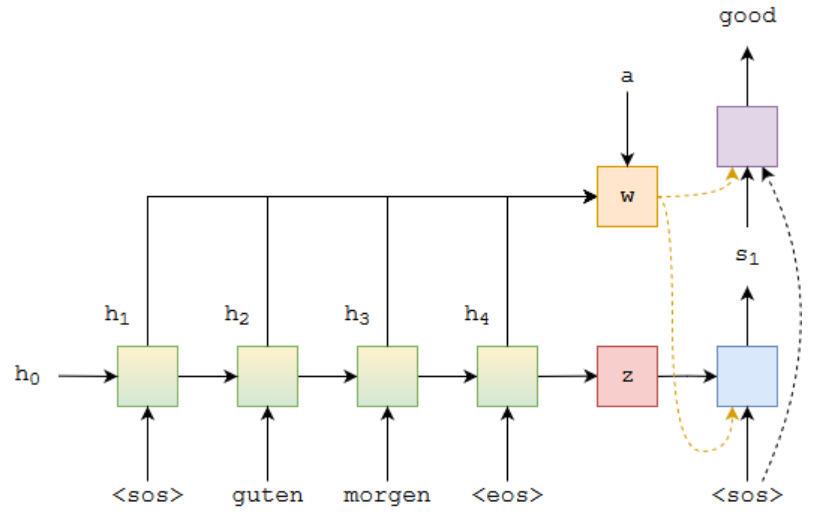

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


### Teacher forcing

Teacher forcing is a method for quickly and efficiently training recurrent neural network models that use the ground truth from a prior time step as input.

___
<font size="2">Форсирование учителя — это метод быстрого и эффективного обучения рекуррентных моделей нейронных сетей, которые используют в качестве входных данных исходную информацию из предыдущего временного шага.</font>

<img src="https://miro.medium.com/max/421/1*U3d8D_GnfW13Y3nDgvwJSw.png">

When training/testing our model, we always know how many words are in our target sentence, so we stop generating words once we hit that many. During inference (i.e. real world usage) it is common to keep generating words until the model outputs an `<eos>` token or after a certain amount of words have been generated.

Once we have our predicted target sentence, $\hat{Y} = \{ \hat{y}_1, \hat{y}_2, ..., \hat{y}_T \}$, we compare it against our actual target sentence, $Y = \{ y_1, y_2, ..., y_T \}$, to calculate our loss. We then use this loss to update all of the parameters in our model.

___

<font size="2">При обучении/тестировании нашей модели мы всегда знаем, сколько слов в нашем целевом предложении, поэтому мы прекращаем генерировать слова, как только достигаем этого количества. Во время логического вывода (т. е. при использовании в реальном мире) обычно продолжают генерировать слова до тех пор, пока модель не выведет токен `<eos>` или после того, как будет сгенерировано определенное количество слов.
Получив прогнозируемое целевое предложение $\hat{Y} = \{ \hat{y}_1, \hat{y}_2, ..., \hat{y}_T \}$, мы сравниваем его с нашим фактическое целевое предложение, $Y ​​= \{ y_1, y_2, ..., y_T \}$, чтобы рассчитать наши потери. Затем мы используем эту потерю для обновления всех параметров в нашей модели.</font>



<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


## Seq2Seq


* $w_t = a_t H$

* $s_t = \text{DecoderGRU}([y_t, w_t], s_{t-1})$

* $\hat{y}_{t+1} = f(y_t, w_t, s_t)$

**Note**: our decoder loop starts at 1, not 0. This means the 0th element of our `outputs` tensor remains all zeros. So our `trg` and `outputs` look something like:
___

<font size="2">**Примечание**: наш цикл декодера начинается с 1, а не с 0. Это означает, что 0-й элемент нашего тензора «выходов» остается полностью нулевым. Итак, наши trg и outputs выглядят примерно так:</font>

$$\begin{align*}
\text{trg} = [<sos>, &y_1, y_2, y_3, <eos>]\\
\text{outputs} = [0, &\hat{y}_1, \hat{y}_2, \hat{y}_3, <eos>]
\end{align*}$$

Later on when we calculate the loss, we cut off the first element of each tensor to get:
___

<font size="2">Позже, когда мы вычисляем потери, мы отсекаем первый элемент каждого тензора, чтобы получить:</font>

$$\begin{align*}
\text{trg} = [&y_1, y_2, y_3, <eos>]\\
\text{outputs} = [&\hat{y}_1, \hat{y}_2, \hat{y}_3, <eos>]
\end{align*}$$

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


## Training

In [ ]:
import modules

imp.reload(modules)

Encoder = modules.Encoder
Attention = modules.Attention
Decoder = modules.DecoderWithAttention
Seq2Seq = modules.Seq2Seq

In [ ]:
INPUT_DIM = len(SRC.vocab)
OUTPUT_DIM = len(TRG.vocab)
ENC_EMB_DIM = 256
DEC_EMB_DIM = 256
HID_DIM = 512
N_LAYERS = 1
ENC_DROPOUT = 0.5
BIDIRECTIONAL = True

PAD_IDX = TRG.vocab.stoi[TRG.pad_token]

attn = Attention(HID_DIM, HID_DIM)
enc = Encoder(INPUT_DIM, ENC_EMB_DIM, HID_DIM, N_LAYERS, ENC_DROPOUT, BIDIRECTIONAL)
dec = Decoder(OUTPUT_DIM, DEC_EMB_DIM, HID_DIM, HID_DIM, N_LAYERS, attn)

# dont forget to put the model to the right device
model = Seq2Seq(enc, dec, device, PAD_IDX).to(device)

In [ ]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.normal_(param.data, mean=0, std=0.01)
        
model.apply(init_weights)

Seq2Seq(
  (encoder): Encoder(
    (embedding): Embedding(14115, 256)
    (rnn): LSTM(256, 512, dropout=0.5, bidirectional=True)
    (dropout): Dropout(p=0.5, inplace=False)
    (h_linear): Linear(in_features=1024, out_features=512, bias=True)
    (c_linear): Linear(in_features=1024, out_features=512, bias=True)
  )
  (decoder): DecoderWithAttention(
    (attention): Attention(
      (attn): Linear(in_features=1536, out_features=512, bias=True)
      (v): Linear(in_features=512, out_features=1, bias=False)
    )
    (embedding): Embedding(10170, 256)
    (rnn): LSTM(1280, 512)
    (out): Linear(in_features=512, out_features=10170, bias=True)
  )
)

In [ ]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)

print(f'The model has {count_parameters(model):,} trainable parameters')

The model has 20,099,258 trainable parameters


In [ ]:
optimizer = optim.AdamW(model.parameters(), weight_decay=0.005)
criterion = nn.CrossEntropyLoss(ignore_index = PAD_IDX)
sheduler = optim.lr_scheduler.MultiStepLR(optimizer, 
                                          milestones=[10, 15], 
                                          gamma=0.1, 
                                          last_epoch=-1)
def train(model, iterator, optimizer, criterion, clip, train_history=None, valid_history=None):
    model.train()
    epoch_loss = 0
    history = []
    for i, batch in enumerate(iterator):
        
        src, src_len = batch.src
        trg = batch.trg

        optimizer.zero_grad()
        output = model(src, src_len, trg)
        output_dim = output.shape[-1]

        #trg = [trg sent len, batch size]
        #output = [trg sent len, batch size, output dim]
        output = output[1:].view(-1, output_dim)
        trg = trg[1:].view(-1)
        #trg = [(trg sent len - 1) * batch size]
        #output = [(trg sent len - 1) * batch size, output dim]
        
        loss = criterion(output, trg)
        loss.backward()
        
        # Let's clip the gradient
        torch.nn.utils.clip_grad_norm_(model.parameters(), clip)
        
        optimizer.step()
        epoch_loss += loss.item()
        
        history.append(loss.cpu().data.numpy())
        if (i+1)%10==0:
            fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))

            clear_output(True)
            ax[0].plot(history, label='train loss')
            ax[0].set_xlabel('Batch')
            ax[0].set_title('Train loss')
            if train_history is not None:
                ax[1].plot(train_history, label='general train history')
                ax[1].set_xlabel('Epoch')
            if valid_history is not None:
                ax[1].plot(valid_history, label='general valid history')
            plt.legend()
            
            plt.show()

        
    return epoch_loss / len(iterator)

def evaluate(model, iterator, criterion):
    
    model.eval()
    epoch_loss = 0
    history = []
    with torch.no_grad():
    
        for i, batch in enumerate(iterator):

            src, src_len = batch.src
            trg = batch.trg

            output = model(src, src_len, trg, 0) #turn off teacher forcing
            output_dim = output.shape[-1]
            #trg = [trg sent len, batch size]
            #output = [trg sent len, batch size, output dim]

            output = output[1:].view(-1, output_dim)
            trg = trg[1:].view(-1)

            #trg = [(trg sent len - 1) * batch size]
            #output = [(trg sent len - 1) * batch size, output dim]

            loss = criterion(output, trg)
            epoch_loss += loss.item()
        
    return epoch_loss / len(iterator)

def epoch_time(start_time, end_time):
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

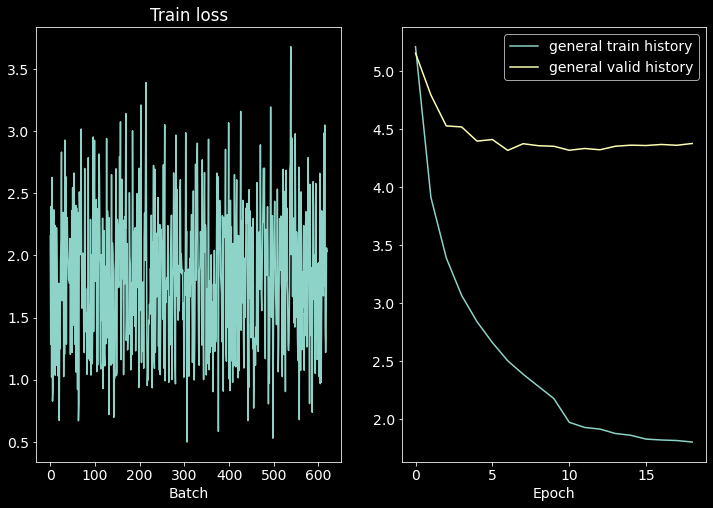

Epoch: 20 | Time: 4m 30s
	Train Loss: 1.815 | Train PPL:   6.140
	 Val. Loss: 4.370 |  Val. PPL:  79.044


In [ ]:
train_history = []
valid_history = []
N_EPOCHS = 20
CLIP = 1
best_valid_loss = float('inf')

for epoch in range(N_EPOCHS):
    
    start_time = time.time()
    
    train_loss = train(model, 
                       train_iterator, 
                       optimizer, 
                       criterion, 
                       CLIP, 
                       train_history, 
                       valid_history)
    valid_loss = evaluate(model, 
                          valid_iterator, 
                          criterion)
    sheduler.step()
    end_time = time.time()
    
    epoch_mins, epoch_secs = epoch_time(start_time, end_time)
    
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'best-val-model.pt')
    
    train_history.append(train_loss)
    valid_history.append(valid_loss)
    print(f'Epoch: {epoch+1:02} | Time: {epoch_mins}m {epoch_secs}s')
    print(f'\tTrain Loss: {train_loss:.3f} | Train PPL: {math.exp(train_loss):7.3f}')
    print(f'\t Val. Loss: {valid_loss:.3f} |  Val. PPL: {math.exp(valid_loss):7.3f}')

__Let's take a look at our network quality__:

___
<font size="2">Давайте оценим качество нашей модели</font>

In [ ]:
def cut_on_eos(tokens_iter):
    for token in tokens_iter:
        if token == '<eos>':
            break
        yield token

def remove_tech_tokens(tokens_iter, tokens_to_remove=['<sos>', '<unk>', '<pad>']):
    return [x for x in tokens_iter if x not in tokens_to_remove]

def generate_translation(src, src_len, trg, model, TRG_vocab):

    model.eval()
    output = model(src, src_len, trg, 0) #turn off teacher forcing
    output = output[1:].argmax(-1)
    original = remove_tech_tokens(cut_on_eos([TRG_vocab.itos[x] for x in list(trg[:, 0].cpu().numpy())]))
    generated = remove_tech_tokens(cut_on_eos([TRG_vocab.itos[x] for x in list(output[:, 0].cpu().numpy())]))
    
    print('Original: {}'.format(' '.join(original)))
    print('Generated: {}'.format(' '.join(generated)))
    print()

def get_text(x, TRG_vocab):
     generated = remove_tech_tokens(cut_on_eos([TRG_vocab.itos[elem] for elem in list(x)]))
     return generated

In [ ]:
PATH = "last_model.pt"
torch.save(model.state_dict(), PATH)

In [ ]:
!gdown 1s_QJkdxH8RSChBh2gPkLXqZNIolq3bKp

Downloading...
From: https://drive.google.com/uc?id=1s_QJkdxH8RSChBh2gPkLXqZNIolq3bKp
To: /content/last_model.pt
100% 80.4M/80.4M [00:00<00:00, 250MB/s]


In [ ]:
model.load_state_dict(torch.load('last_model.pt'))

steps = 20

for batch in test_iterator:
    src, src_len = batch.src
    trg = batch.trg
    generate_translation(src, src_len, trg, model, TRG.vocab)
    steps -= 1
    if steps == 0:
      break

Original: guests can enjoy the on - site restaurant .
Generated: guests can enjoy the on - site restaurant .

Original: the property offers free parking .
Generated: the property offers free parking .

Original: the property offers free parking .
Generated: the property offers free parking .

Original: shared kitchen facilities are at guests ’ disposal .
Generated: there is a shared kitchen at the property .

Original: laundry services are available upon request .
Generated: laundry services are available on request .

Original: free private parking is possible on site .
Generated: free private parking is available on site .

Original: each week , a new lunchtime menu is available .
Generated: special diet menus are also available .

Original: the accommodation is air conditioned and is equipped with a tv .
Generated: the accommodation will provide you with a tv and air conditioning .

Original: ibiza airport is located 5 km away .
Generated: rijeka airport is 5 km away .

Original: th

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


## Bleu

[link](https://www.aclweb.org/anthology/P02-1040.pdf)

<img src="https://drive.google.com/uc?id=1umJF2S8PiayxD9Xo8xvjW8QsrSLidozD" height=400>

In [ ]:
original_text = []
generated_text = []
model.eval()
with torch.no_grad():

    for i, batch in tqdm.tqdm(enumerate(test_iterator)):

        src, src_len = batch.src
        trg = batch.trg

        output = model(src, src_len, trg, 0) #turn off teacher forcing

        #trg = [trg sent len, batch size]
        #output = [trg sent len, batch size, output dim]

        output = output[1:].argmax(-1)
        
        original_text.extend([get_text(x, TRG.vocab) for x in trg.cpu().numpy().T])
        generated_text.extend([get_text(x, TRG.vocab) for x in output.detach().cpu().numpy().T])


118it [00:13,  8.54it/s]


In [ ]:
bleu = round(corpus_bleu([[text] for text in original_text], generated_text) * 100, 1)
print(f"BLEU score для тестовой выборки: {bleu}")

BLEU score для тестовой выборки: 30.4


<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___


## Оценка\Score:

* `2` points if `21 < bleu score < 23`
* `4` points if `23 < bleu score < 25`
* `7` points if `25 < bleu score < 27`
* `9` points if `27 < bleu score < 29`
* `10` points if `bleu score > 29`




## Conclusion


As a result of the work, the `Seq2Seq-model` is implemented using `concate-attention` with `bleu_score` -  30.4.
A distinctive feature of this model is the Attention class, a modified input decoder that is fed a concatenated vector consisting of `attention` and `hidden_cell` of the encoder's hidden state. We also demanded the packing of sequences, for this, the introduction of the text was added to the download of the set - the introduction - we changed the encoder. The model was trained quite difficult, but in general we achieved good results.

___

<font size="2">В результате работы удалось реализовать `Seq2Seq-модель` с использованием `concate-attention`. с которой получили `bleu_score`, равный 30.4.
Отличительной особенностью данной модели является наличие класса Attention и измененый декодер, на вход которому подается конкатенированный вектор, состоящий из `attention` и `hidden_cell` скрытого состояния энкодера. Также мы применяли упааковку последовательностей, для этого в загрузку сета добавили опцию - добавлять длину текста - мы изменили энкодер. Обучалась модель достаточно сложно, но в целом мы достигли неплохиз результатов </font>

<div style="float:left;margin:0 10px 10px 0" markdown="1">
    <a href="#footer"><img src='https://img.shields.io/badge/К содержанию-&#x21A9-blue'></a>
</div>

___
